Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 28, 64)         │        23,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_1              │ (None, 28, 28)         │         1,820 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,628 (100.11 KB)

 Trainable params: 25,628 (100.11 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3
844/844 ━━━━━━━━━━━━━━━━━━━━ 31s 33ms/step - accuracy: 0.0799 - loss: 0.2917 - val_accuracy: 0.0921 - val_loss: 0.0683
Epoch 2/3
844/844 ━━━━━━━━━━━━━━━━━━━━ 27s 32ms/step - accuracy: 0.0885 - loss: 0.0567 - val_accuracy: 0.0897 - val_loss: 0.0362
Epoch 3/3
844/844 ━━━━━━━━━━━━━━━━━━━━ 40s 31ms/step - accuracy: 0.0867 - loss: 0.0329 - val_accuracy: 0.0888 - val_loss: 0.0258
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


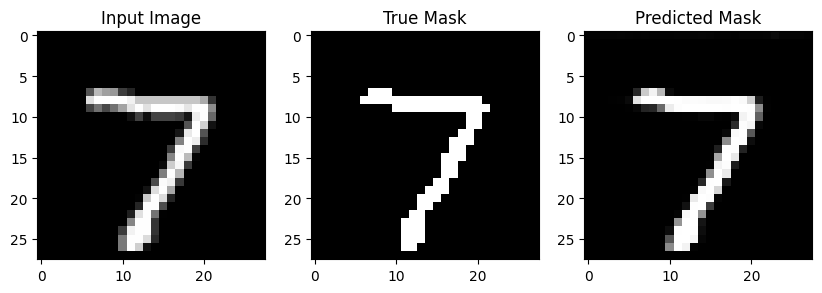

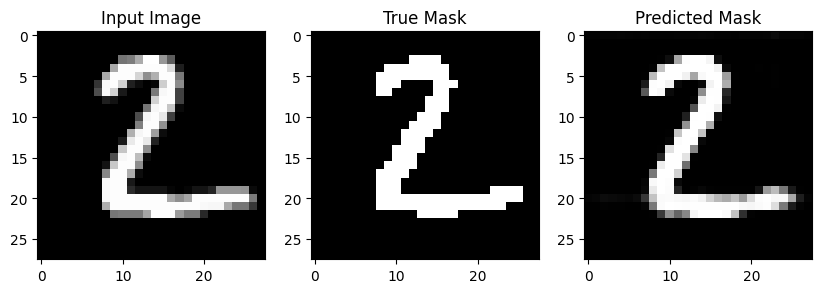

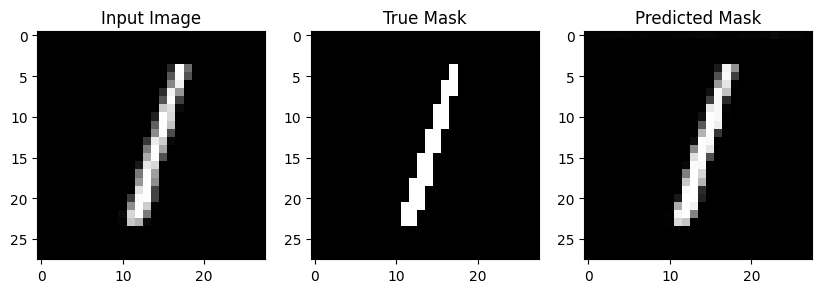

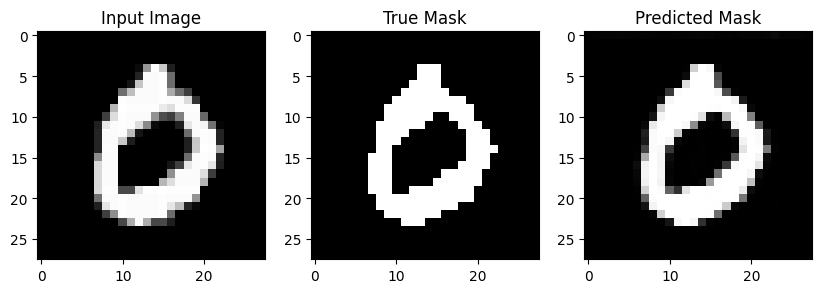

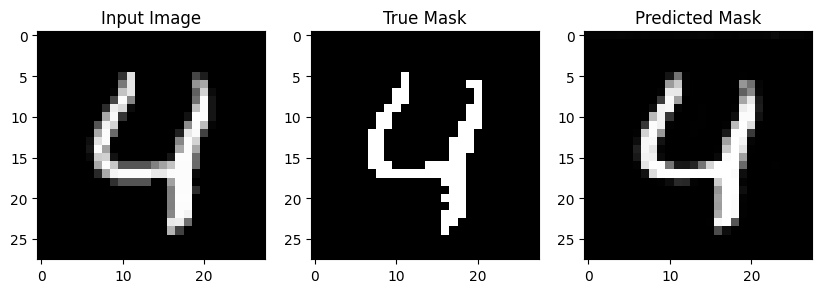

In [10]:
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense, TimeDistributed, Reshape, Input
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
# Load MNIST dataset
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

# Normalize and reshape
x_train = x_train / 255.0
x_test = x_test / 255.0

# Treat each row of the image as a time step
# Shape: (batch_size, time_steps=28, features=28)
x_train_seq = x_train.reshape(-1, 28, 28)
x_test_seq = x_test.reshape(-1, 28, 28)

# Create dummy segmentation masks (thresholded images)
y_train = (x_train > 0.5).astype(np.float32).reshape(-1, 28, 28)
y_test = (x_test > 0.5).astype(np.float32).reshape(-1, 28, 28)
inputs = Input(shape=(28, 28))  # 28 time steps, 28 features
x = LSTM(64, return_sequences=True)(inputs)
x = TimeDistributed(Dense(28, activation='sigmoid'))(x)  # Predict 28 pixels per row
outputs = x  # Already (28, 28)

model = Model(inputs, outputs)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(x_train_seq, y_train, epochs=3, batch_size=64, validation_split=0.1)
# Predict on test data
preds = model.predict(x_test_seq[:5])

# Plot original and predicted masks
for i in range(5):
    plt.figure(figsize=(10, 3))
    plt.subplot(1, 3, 1)
    plt.title("Input Image")
    plt.imshow(x_test_seq[i], cmap='gray')
    plt.subplot(1, 3, 2)
    plt.title("True Mask")
    plt.imshow(y_test[i], cmap='gray')
    plt.subplot(1, 3, 3)
    plt.title("Predicted Mask")
    plt.imshow(preds[i], cmap='gray')
    plt.show()



